# Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,ID,datetime,temperature,var1,pressure,windspeed,var2,electricity_consumption
0,0,2013-07-01 00:00:00,-11.4,-17.1,1003.0,571.910,A,216.0
1,1,2013-07-01 01:00:00,-12.1,-19.3,996.0,575.040,A,210.0
2,2,2013-07-01 02:00:00,-12.9,-20.0,1000.0,578.435,A,225.0
3,3,2013-07-01 03:00:00,-11.4,-17.1,995.0,582.580,A,216.0
4,4,2013-07-01 04:00:00,-11.4,-19.3,1005.0,586.600,A,222.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       26496 non-null  int64  
 1   datetime                 26496 non-null  object 
 2   temperature              26496 non-null  float64
 3   var1                     26496 non-null  float64
 4   pressure                 26496 non-null  float64
 5   windspeed                26496 non-null  float64
 6   var2                     26496 non-null  object 
 7   electricity_consumption  26496 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 1.6+ MB


In [5]:
df.describe()

,ID,temperature,var1,pressure,windspeed,electricity_consumption
count,26496.000000,26496.000000,26496.000000,26496.000000,26496.000000,26496.000000
mean,17455.500000,5.098989,-1.916233,986.450615,23.959956,298.359601
std,10122.873673,8.682860,10.424860,12.002647,48.280321,108.020555
min,0.000000,-17.100000,-32.900000,953.000000,1.075000,174.000000
25%,8717.750000,-2.900000,-10.700000,978.000000,3.155000,219.000000
50%,17435.500000,6.400000,-1.400000,986.000000,6.545000,267.000000
75%,26177.250000,12.100000,7.900000,995.000000,22.260000,342.000000
max,34895.000000,23.600000,18.600000,1024.000000,586.600000,1386.000000


In [6]:
df.shape

(26496, 8)

In [7]:
df.isnull().sum()

ID                         0
datetime                   0
temperature                0
var1                       0
pressure                   0
windspeed                  0
var2                       0
electricity_consumption    0
dtype: int64

# Analysis

In [8]:
df.columns

Index(['ID', 'datetime', 'temperature', 'var1', 'pressure', 'windspeed',
       'var2', 'electricity_consumption'],
      dtype='object')

In [9]:
df.var2.value_counts()

A    25239
C     1040
B      217
Name: var2, dtype: int64

In [10]:
df.var1.value_counts()

 10.0    836
 8.6     809
 10.7    797
 7.9     779
 9.3     770
        ... 
-29.3      3
 17.9      2
 18.6      1
-32.1      1
-32.9      1
Name: var1, Length: 71, dtype: int64

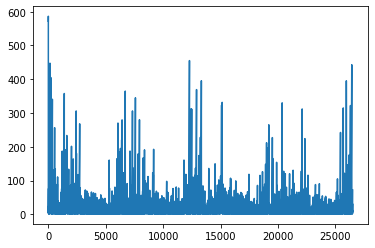

In [11]:
plt.plot(df.windspeed)

In [12]:
df.electricity_consumption.value_counts()

210.0     817
216.0     739
204.0     732
198.0     667
222.0     658
         ... 
1206.0      1
1149.0      1
1083.0      1
1062.0      1
879.0       1
Name: electricity_consumption, Length: 252, dtype: int64

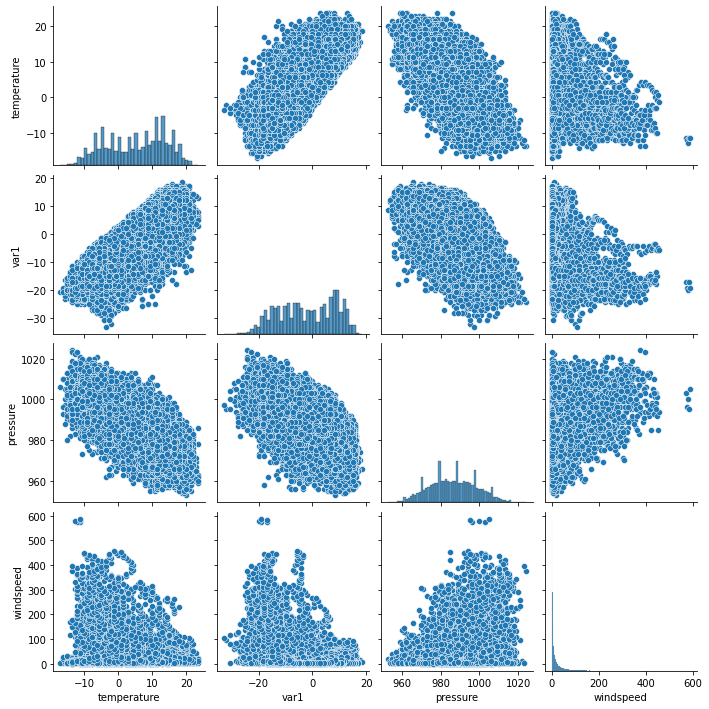

In [13]:
sns.pairplot(df[['temperature', 'var1', 'pressure', 'windspeed', 'var2']])

In [14]:
data = df[['temperature', 'var1', 'pressure', 'windspeed', 'var2', 'electricity_consumption']]

In [15]:
data.head()

,temperature,var1,pressure,windspeed,var2,electricity_consumption
0,-11.4,-17.1,1003.0,571.910,A,216.0
1,-12.1,-19.3,996.0,575.040,A,210.0
2,-12.9,-20.0,1000.0,578.435,A,225.0
3,-11.4,-17.1,995.0,582.580,A,216.0
4,-11.4,-19.3,1005.0,586.600,A,222.0


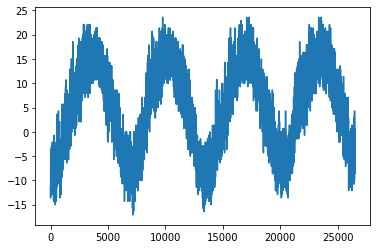

In [16]:
plt.plot(data.temperature)

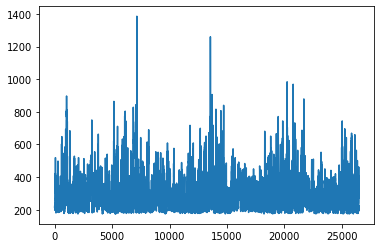

In [17]:
plt.plot(data.electricity_consumption)

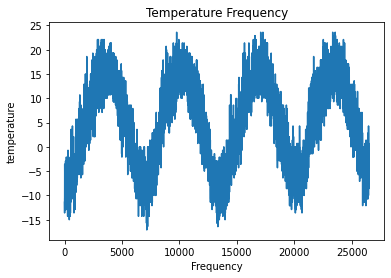

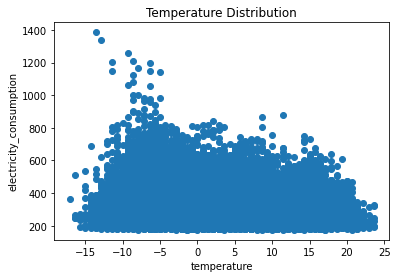

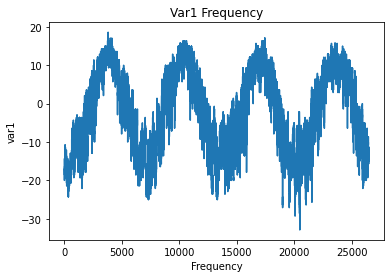

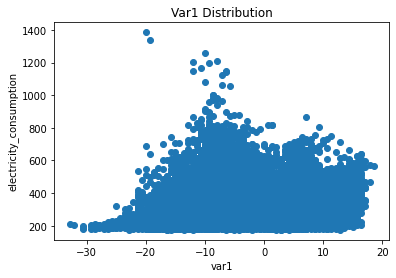

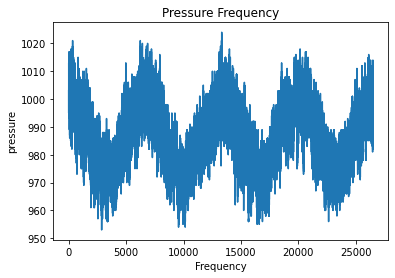

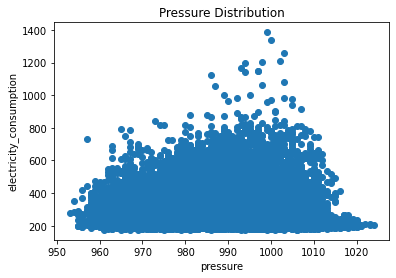

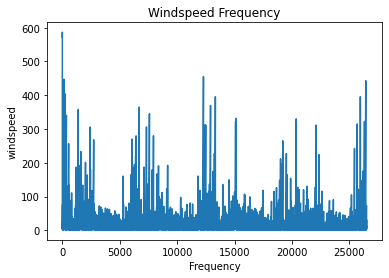

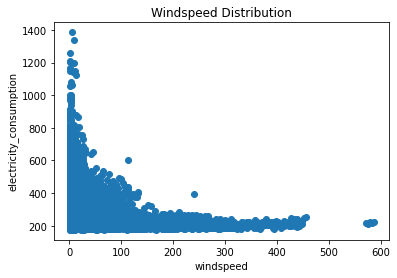

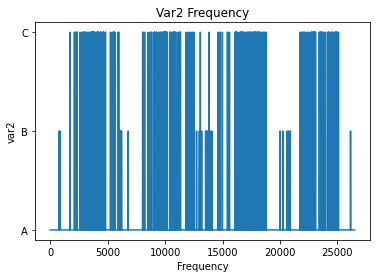

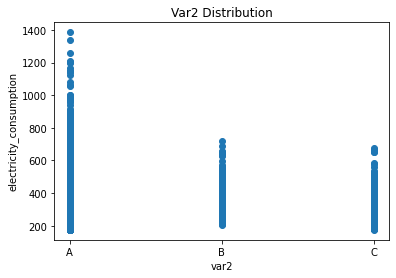

In [18]:
for column in ['temperature', 'var1', 'pressure', 'windspeed', 'var2']:
    plt.plot(data[column])
    plt.title(f'{column.capitalize()} Frequency')
    plt.xlabel('Frequency')
    plt.ylabel(column)
    plt.show()
    plt.scatter(data[column], data.electricity_consumption)
    plt.title(f'{column.capitalize()} Distribution')
    plt.xlabel(column)
    plt.ylabel('electricity_consumption')
    plt.show()

# X - Y Split

In [19]:
data = df.copy()

In [20]:
x = data.iloc[:, 2:-1]

In [21]:
y = data.iloc[:, -1]

# Encoding

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
encoder = LabelEncoder()

In [24]:
x.var2 = encoder.fit_transform(x.var2)

# Scaling

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()

In [27]:
x.head()

,temperature,var1,pressure,windspeed,var2
0,-11.4,-17.1,1003.0,571.910,0
1,-12.1,-19.3,996.0,575.040,0
2,-12.9,-20.0,1000.0,578.435,0
3,-11.4,-17.1,995.0,582.580,0
4,-11.4,-19.3,1005.0,586.600,0


In [28]:
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

In [29]:
x.head()

,temperature,var1,pressure,windspeed,var2
0,-1.900215,-1.456523,1.378837,11.349560,-0.21832
1,-1.980835,-1.667561,0.795622,11.414391,-0.21832
2,-2.072972,-1.734710,1.128888,11.484710,-0.21832
3,-1.900215,-1.456523,0.712305,11.570565,-0.21832
4,-1.900215,-1.667561,1.545470,11.653830,-0.21832


# Train Test Split

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

# Training with Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
model = LinearRegression()

In [34]:
model.fit(x_train, y_train)

LinearRegression()

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
model.score(x_test, y_test)

0.1907193667180188

# Training with Ridge

# Training with Decision Tree

In [37]:
from sklearn.tree import DecisionTreeRegressor

In [38]:
model = DecisionTreeRegressor()

In [39]:
model.fit(x_train, y_train)

DecisionTreeRegressor()

In [40]:
model.score(x_test, y_test)

-0.41044575464025845

In [41]:
from sklearn.linear_model import Ridge

In [42]:
model = Ridge()

In [43]:
model.fit(x_train, y_train)

Ridge()

In [44]:
model.score(x_test, y_test)

0.1907223006357096

# Training with Lasso

In [45]:
from sklearn.linear_model import Lasso

In [46]:
model = Lasso()

In [47]:
model.fit(x_train, y_train)

Lasso()

In [48]:
model.score(x_test, y_test)

0.18991150883254726

# Training with Decision Tree

In [49]:
from sklearn.tree import DecisionTreeRegressor

In [50]:
model = DecisionTreeRegressor()

In [51]:
model.fit(x_train, y_train)

DecisionTreeRegressor()

In [52]:
model.score(x_test, y_test)

-0.3871596991519628

# Training with Random Forest

In [53]:
from sklearn.ensemble import RandomForestRegressor

In [54]:
model = RandomForestRegressor()

In [55]:
model.fit(x_train, y_train)

RandomForestRegressor()

In [56]:
model.score(x_test, y_test)

0.22593487917788857

# Training with XGBoost Regressor

In [57]:
from xgboost import XGBRegressor

In [58]:
model = XGBRegressor()

In [59]:
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [60]:
model.score(x_test, y_test)

0.2482451863594074

In [61]:
model.score(x_train, y_train)

0.5456853249568606

# Training with date time columns included

In [62]:
df.head()

,ID,datetime,temperature,var1,pressure,windspeed,var2,electricity_consumption
0,0,2013-07-01 00:00:00,-11.4,-17.1,1003.0,571.910,A,216.0
1,1,2013-07-01 01:00:00,-12.1,-19.3,996.0,575.040,A,210.0
2,2,2013-07-01 02:00:00,-12.9,-20.0,1000.0,578.435,A,225.0
3,3,2013-07-01 03:00:00,-11.4,-17.1,995.0,582.580,A,216.0
4,4,2013-07-01 04:00:00,-11.4,-19.3,1005.0,586.600,A,222.0


In [63]:
data.head()

,ID,datetime,temperature,var1,pressure,windspeed,var2,electricity_consumption
0,0,2013-07-01 00:00:00,-11.4,-17.1,1003.0,571.910,A,216.0
1,1,2013-07-01 01:00:00,-12.1,-19.3,996.0,575.040,A,210.0
2,2,2013-07-01 02:00:00,-12.9,-20.0,1000.0,578.435,A,225.0
3,3,2013-07-01 03:00:00,-11.4,-17.1,995.0,582.580,A,216.0
4,4,2013-07-01 04:00:00,-11.4,-19.3,1005.0,586.600,A,222.0


In [64]:
data.head()

,ID,datetime,temperature,var1,pressure,windspeed,var2,electricity_consumption
0,0,2013-07-01 00:00:00,-11.4,-17.1,1003.0,571.910,A,216.0
1,1,2013-07-01 01:00:00,-12.1,-19.3,996.0,575.040,A,210.0
2,2,2013-07-01 02:00:00,-12.9,-20.0,1000.0,578.435,A,225.0
3,3,2013-07-01 03:00:00,-11.4,-17.1,995.0,582.580,A,216.0
4,4,2013-07-01 04:00:00,-11.4,-19.3,1005.0,586.600,A,222.0


In [65]:
data[['var2_A', 'var2_B', 'var2_C']] = pd.get_dummies(data[['var2']])

In [66]:
data.drop('var2', axis = 1, inplace = True)

In [67]:
def date_func(row):
    datetime = row[1].split()
    date = datetime[0].split('-')
    time = datetime[1].split(':')
    
    year = int(date[0])
    month = int(date[1])
    day = int(date[2])
    
    hour = int(time[0])
    minute = int(time[1])
    
    return [year, month, day, hour, minute]

In [68]:
data[['year', 'month', 'day', 'hour', 'minute']] = df.apply(date_func, axis = 1, result_type = 'expand')

In [69]:
data.head()

,ID,datetime,temperature,var1,pressure,windspeed,electricity_consumption,var2_A,var2_B,var2_C,year,month,day,hour,minute
0,0,2013-07-01 00:00:00,-11.4,-17.1,1003.0,571.910,216.0,1,0,0,2013,7,1,0,0
1,1,2013-07-01 01:00:00,-12.1,-19.3,996.0,575.040,210.0,1,0,0,2013,7,1,1,0
2,2,2013-07-01 02:00:00,-12.9,-20.0,1000.0,578.435,225.0,1,0,0,2013,7,1,2,0
3,3,2013-07-01 03:00:00,-11.4,-17.1,995.0,582.580,216.0,1,0,0,2013,7,1,3,0
4,4,2013-07-01 04:00:00,-11.4,-19.3,1005.0,586.600,222.0,1,0,0,2013,7,1,4,0


# Training with XGBoost

In [70]:
x = data.drop('electricity_consumption', axis = 1)
x = x.iloc[:, 2:]
y = data.electricity_consumption

In [71]:
x.head()

,temperature,var1,pressure,windspeed,var2_A,var2_B,var2_C,year,month,day,hour,minute
0,-11.4,-17.1,1003.0,571.910,1,0,0,2013,7,1,0,0
1,-12.1,-19.3,996.0,575.040,1,0,0,2013,7,1,1,0
2,-12.9,-20.0,1000.0,578.435,1,0,0,2013,7,1,2,0
3,-11.4,-17.1,995.0,582.580,1,0,0,2013,7,1,3,0
4,-11.4,-19.3,1005.0,586.600,1,0,0,2013,7,1,4,0


In [72]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

#### random forest regressor

In [73]:
model = RandomForestRegressor()

In [74]:
model.fit(x_train, y_train)

RandomForestRegressor()

In [75]:
model.score(x_test, y_test)

0.7083868743746378

#### xgboost regressor

In [76]:
model = XGBRegressor()

In [77]:
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [78]:
model.score(x_test, y_test)

0.6650900871944708

In [79]:
model.score(x_train, y_train)

0.8189439091408537

#### scaling

In [80]:
x.head()

,temperature,var1,pressure,windspeed,var2_A,var2_B,var2_C,year,month,day,hour,minute
0,-11.4,-17.1,1003.0,571.910,1,0,0,2013,7,1,0,0
1,-12.1,-19.3,996.0,575.040,1,0,0,2013,7,1,1,0
2,-12.9,-20.0,1000.0,578.435,1,0,0,2013,7,1,2,0
3,-11.4,-17.1,995.0,582.580,1,0,0,2013,7,1,3,0
4,-11.4,-19.3,1005.0,586.600,1,0,0,2013,7,1,4,0


In [81]:
cols = ['temperature', 'var1', 'pressure', 'windspeed']
scaler = StandardScaler()
x_train[cols] = scaler.fit_transform(x_train[cols])
x_test[cols] = scaler.transform(x_test[cols])

#### training with random forest

In [82]:
model = RandomForestRegressor()

In [83]:
model.fit(x_train, y_train)

RandomForestRegressor()

In [84]:
model.score(x_test, y_test)

0.7052402494295162

#### training with xgboost

In [85]:
model = XGBRegressor()

In [86]:
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [87]:
model.score(x_test, y_test)

0.6649513662557811